<a href="https://colab.research.google.com/github/sandeshar/google/blob/main/working%20gan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bryanb/abstract-art-gallery

 99% 685M/693M [00:06<00:00, 117MB/s] 
100% 693M/693M [00:06<00:00, 111MB/s]


In [ ]:
! unzip abstract-art-gallery.zip

Archive:  abstract-art-gallery.zip
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_0.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_10.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_100.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1000.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1001.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1002.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1003.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1004.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1005.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1006.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1007.jpg  
  inflating: Abstract_gallery/Abstract_gallery/Abstract_image_1008.jpg  
  inflating: Abstract_gal

In [ ]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
from torchvision import datasets,transforms
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
def plot(images):
  i = images.detach().cpu().numpy()
  fig = plt.figure(figsize=(10,10))
  a=1
  rc = 5
  for image in i:
    fig.add_subplot(rc,rc,a)
    a+=1
    plt.imshow(image.reshape(250,250))
    if a>10:
      break
  plt.pause(0.005)

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.dis = nn.Sequential(
        nn.Linear(250*250,564),
        nn.LeakyReLU(0.01),
        nn.Linear(564,256),
        nn.LeakyReLU(0.01),
        nn.Linear(256,128),
        nn.LeakyReLU(0.01),
        nn.Linear(128,1),
        nn.Sigmoid(),
            )

  def forward(self,x):
    return self.dis(x)

In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(100,128),
        nn.LeakyReLU(0.01),
        nn.Linear(128,256),
        nn.LeakyReLU(0.01),
        nn.Linear(256,582),
        nn.LeakyReLU(0.01),
        nn.Linear(582,1080),
        nn.LeakyReLU(0.01),
        nn.Linear(1080,3160),
        nn.LeakyReLU(0.01),
        nn.Linear(3160,250*250),
        nn.Tanh(),
          )

  def forward(self,x):
    return self.gen(x)

In [ ]:
#Hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 1e-4
epochs = 50

batch_size = 32
disc = Discriminator().to(device)
gen = Generator().to(device)
fixed_noise = torch.randn(batch_size,100).to(device)

disc_opt = optim.Adam(disc.parameters(),lr=lr)
gen_opt = optim.Adam(gen.parameters(),lr=lr)

transfor = transforms.Compose([
          transforms.ToTensor(),
          transforms.CenterCrop(250),
          transforms.Normalize((0.5,),(0.5,)),
               ])

data = datasets.ImageFolder('Abstract_gallery/',transform=transfor)

loader = DataLoader(data,shuffle=True,batch_size=batch_size)

criterion = nn.BCELoss()

epochs: 0/50 batch: 0/87 
 gen_loss: 0.696622371673584 disc_loss= 0.6889752149581909


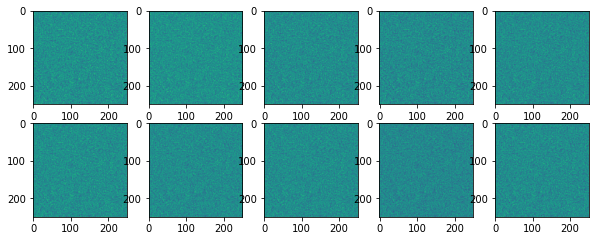

epochs: 1/50 batch: 0/87 
 gen_loss: 1.139655590057373 disc_loss= 0.2386797070503235


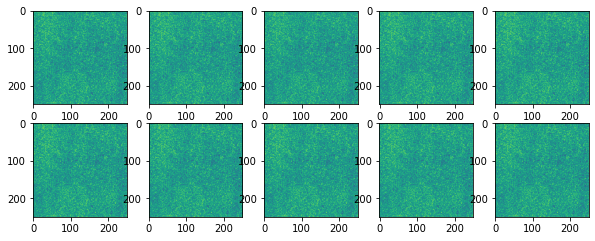

epochs: 2/50 batch: 0/87 
 gen_loss: 1.6026204824447632 disc_loss= 0.13576580584049225


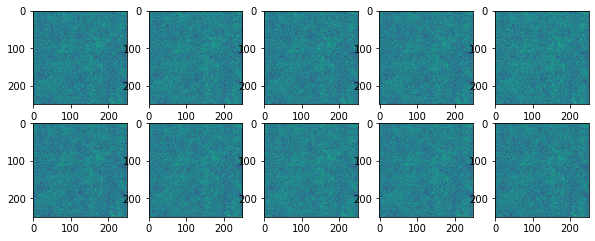

epochs: 3/50 batch: 0/87 
 gen_loss: 1.1740925312042236 disc_loss= 0.23007364571094513


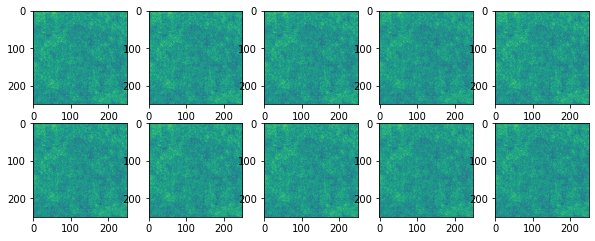

epochs: 4/50 batch: 0/87 
 gen_loss: 1.1458008289337158 disc_loss= 0.3736124336719513


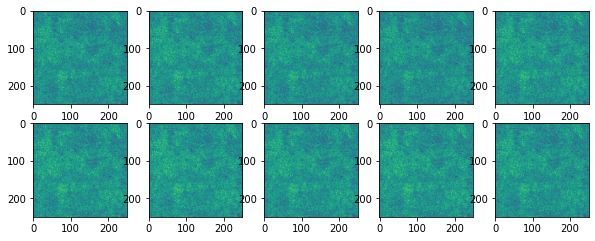

epochs: 5/50 batch: 0/87 
 gen_loss: 1.525630235671997 disc_loss= 0.1738911122083664


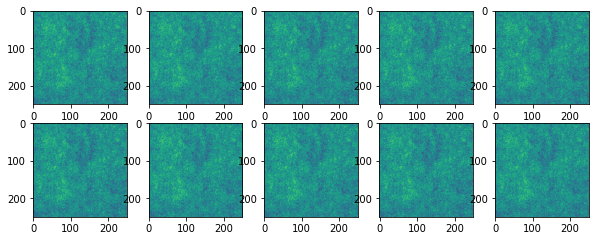

epochs: 6/50 batch: 0/87 
 gen_loss: 1.1612935066223145 disc_loss= 0.5007311701774597


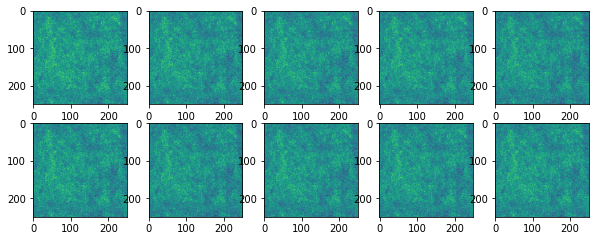

epochs: 7/50 batch: 0/87 
 gen_loss: 1.4440678358078003 disc_loss= 0.6574419736862183


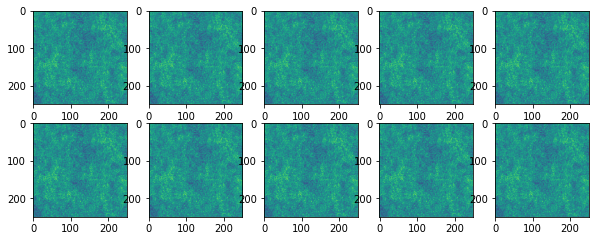

epochs: 8/50 batch: 0/87 
 gen_loss: 0.8784705996513367 disc_loss= 0.5749565362930298


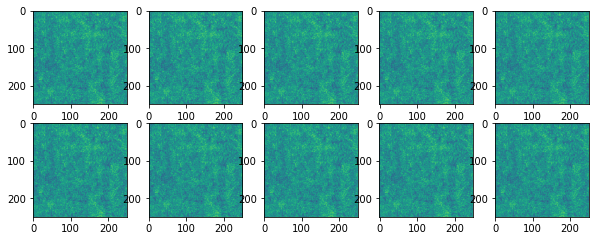

epochs: 9/50 batch: 0/87 
 gen_loss: 1.3825076818466187 disc_loss= 0.529495120048523


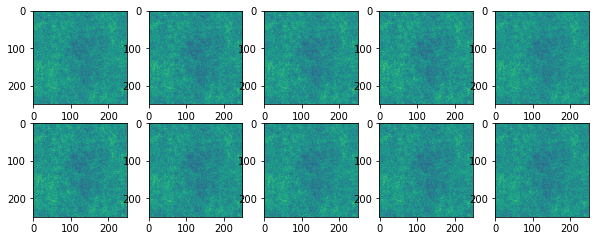

epochs: 10/50 batch: 0/87 
 gen_loss: 4.430403709411621 disc_loss= 0.4888528883457184


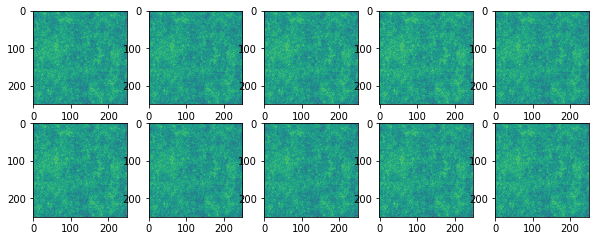

epochs: 11/50 batch: 0/87 
 gen_loss: 4.171120643615723 disc_loss= 0.2688762843608856


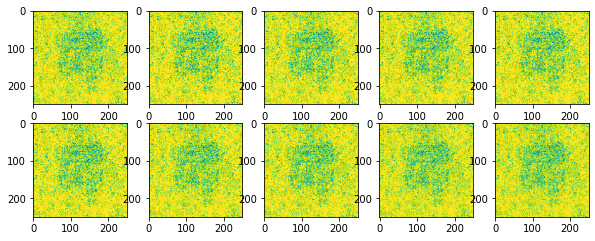

epochs: 12/50 batch: 0/87 
 gen_loss: 19.83222198486328 disc_loss= 0.0017161546275019646


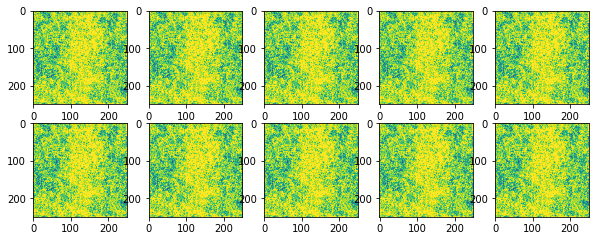

epochs: 13/50 batch: 0/87 
 gen_loss: 9.858482360839844 disc_loss= 0.022412452846765518


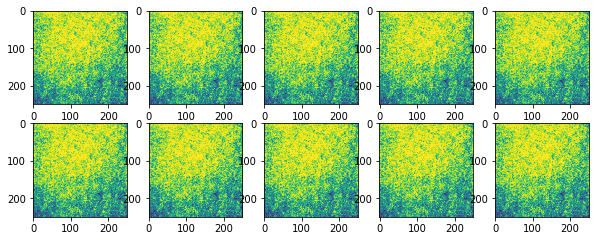

epochs: 14/50 batch: 0/87 
 gen_loss: 2.859363317489624 disc_loss= 0.1103852242231369


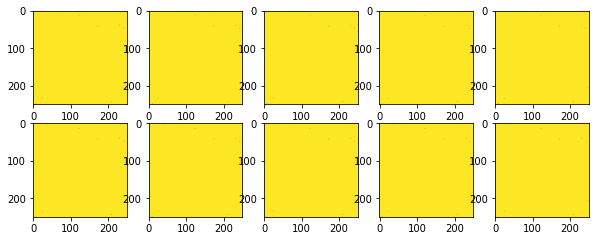

epochs: 15/50 batch: 0/87 
 gen_loss: 2.792259931564331 disc_loss= 0.13189059495925903


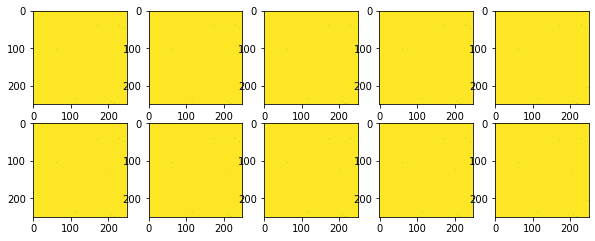

epochs: 16/50 batch: 0/87 
 gen_loss: 4.110274314880371 disc_loss= 0.06788554042577744


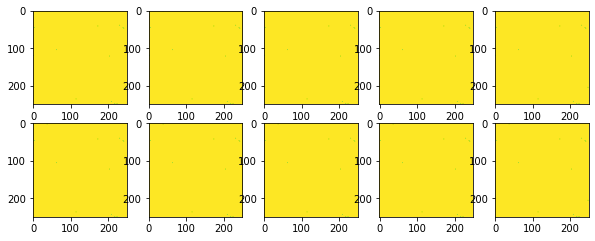

In [ ]:
for epoch in range(epochs):
  for idx,(real,_) in enumerate(loader):
    real = real.view(-1,250*250).to(device)
    batch_size = real.shape[0]

    # Train Discriminator
    noise = torch.randn(batch_size,100).to(device)
    fake = gen(noise)
    discR = disc(real).view(-1)
    lossD_real = criterion(discR,torch.ones_like(discR))

    discF = disc(fake).view(-1)
    lossD_fake = criterion(discF,torch.zeros_like(discF))

    lossD = (lossD_real+lossD_fake)/2
    disc.zero_grad()
    lossD.backward(retain_graph=True)
    disc_opt.step()

    # Train Generator
    output = disc(fake).view(-1)
    lossG = criterion(output,torch.ones_like(output))
    gen.zero_grad()
    lossG.backward(retain_graph=True)
    gen_opt.step()

    if idx == 0:
      print(f"epochs: {epoch}/{epochs} batch: {idx}/{len(loader)} \n gen_loss: {lossG} disc_loss= {lossD}")
      plot(fake)